# In order to draw a graph of the sensitivity test results: 
1. use the 'read_results.m' in ezclimate folder to combine the test results and create a data file named 'sensitivity_reult_x.mat';
2. check the mat file and delete samples with NaN values
3. read the file and run the code below to generate the plot

In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio
import pickle
import numpy as np

# read the file to variable data and import all the variables we concern

In [3]:
#load results stored in matlab
data = sio.loadmat('sensitivity_result_12.mat') #change the name of the file to read
data_base = sio.loadmat('sensitivity_base_results.mat')
p = np.array(-data['price_summary'])
# m = np.array(data['mitigation_summary'])
iteration = np.array(data['iteration_summary'])
u = np.array(-data['utility_summary'])
# u_node = np.array(-data['utility_node_summary'])
norm = np.array(data['final_norm_g_QN_summary'])
# fcount = np.array(data['fcount_summary'])
p_base = np.array(data_base['price_m_t'])

D:\Ted_Yang\Anaconda\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


# Import the treemodel

In [4]:
from tree import TreeModel

# GET_AVE_PRICE 
* takes the price results for each node and sample from the data
* returns the average price for all the periods of each sample

In [5]:
def get_ave_price(price,decision_times): #period average for each sample
    t = TreeModel(decision_times)
    nodes_index = []
    for i in range(t.num_periods): #get nodes for slicing
        nodes_index.append(t.get_nodes_in_period(i)) 
    period_price_ave = np.zeros((price.shape[1], t.num_periods))
    for i in range(price.shape[1]):  #calculate the period average for each sample
        for j in range(t.num_periods):
            period_price_ave[i][j] = np.average(price[:,i][nodes_index[j][0]:nodes_index[j][1]+1])
    return period_price_ave

# GET_90_QUANTILE
* takes the period average from get_ave_price
* returns 2 arrays list_min and list_max with 5% and 95% quantile values for the period averages

In [6]:
def get_90_quantile(period_price_ave): #5% and 95% percentiles for all the samples
    list0 = period_price_ave[:,0]
    list1 = period_price_ave[:,1]
    list2 = period_price_ave[:,2]
    list3 = period_price_ave[:,3]
    list4 = period_price_ave[:,4]
    list5 = period_price_ave[:,5]
    list_ = [list0,list1,list2,list3,list4,list5]
    fivepercent = int(len(list0)*0.05)
    for i in range(len(list_)):
        list_[i]=np.sort(list_[i])[fivepercent:-fivepercent] #take the 90% of the sorted results
    list_min = []
    list_max = []
    for i in list_:
        list_min.append(i[0])
        list_max.append(i[-1])   
    return list_min,list_max #take the lower and upper bounds for the test results

# Draw the graph: remember to change the name of the picture and the title!

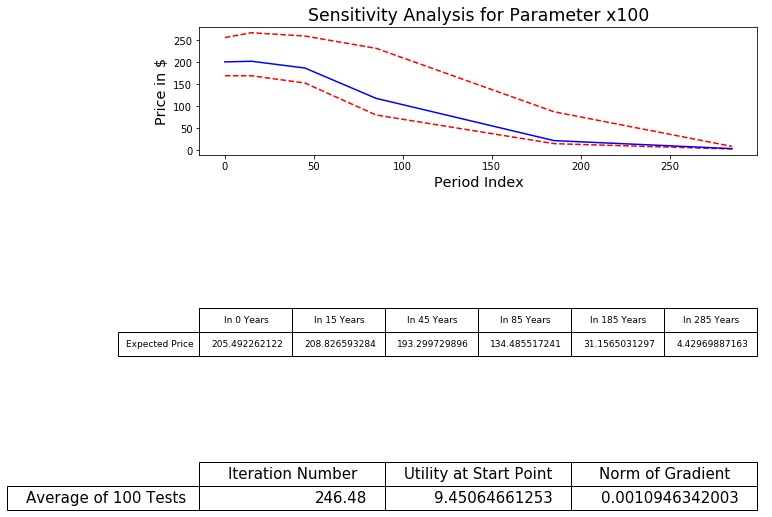

In [7]:
decision_times=[0, 15, 45, 85, 185, 285, 385]

#get the period average and 2 boundaries with get_ave_price and get_90_quantile
period_price_ave = get_ave_price(p, decision_times)
period_price_base = get_ave_price(p_base,decision_times)
period_price_base = -np.mean(period_price_base,axis=0)
list_min,list_max = get_90_quantile(period_price_ave)

fig, (ax, tabay, tabax) = plt.subplots(nrows=3, figsize=(10,8))
#draw the subplot with the sample average and the 2 boundaries
ax.plot(decision_times[:-1],list_min, 'r--', 
        decision_times[:-1],list_max, 'r--',
        decision_times[:-1],period_price_base,'b')
ax.set_title("Sensitivity Analysis for Parameter x100", size ='xx-large')
ax.set_ylabel('Price in $', size = 'x-large')
ax.set_xlabel('Period Index', size = 'x-large')

#draw the table with the samples' period average
tabay.axis("off")
columns_price = ['In %d Years' %x for x in decision_times]
row_label_price = ['Expected Price']
cell_text_price = np.zeros([1,len(period_price_ave[0,:])])
cell_text_price[0] = np.average(period_price_ave,0)
the_table_price = tabay.table(cellText=cell_text_price,
                             rowLabels=row_label_price,
                             colLabels=columns_price)
the_table_price.set_fontsize(38)
the_table_price.scale(1,2)

#draw the table with the average of some parameters 
tabax.axis("off")
columns = ['Iteration Number','Utility at Start Point', 'Norm of Gradient'] #define the parameters
row_label = ['Average of %d Tests' %p.shape[1]] #define the label/content of the rows
rows = len(row_label) 
cell_text = np.zeros([1,len(columns)]) #define the content of the table
#append the cell_text if you want to display the information of all the inividual samples
#for row in range(len(norm)):
    #cell_text[row,:]=[iteration[row],u[row],norm[row]]
cell_text[0,:] = [np.average(iteration),np.average(u),np.average(norm)]

the_table = tabax.table(cellText=cell_text,
                  rowLabels=row_label,
                  #rowColours=colors,
                  colLabels=columns,
                       loc = 'bottom')#define the table
the_table.set_fontsize(34)
the_table.scale(1, 2)

#save the figure
fig.savefig('sensitivity_result_12.png',bbox_inches='tight')#change the name of the figure here
plt.show()

In [7]:
np.average(period_price_ave,0)

array([ 200.73854848,  202.20248038,  186.80809361,  118.1601182 ,
         21.91947918,    3.69335438])

In [8]:
period_price_base = get_ave_price(p_base,decision_times)

In [9]:
period_price_base

array([[-202.80440914, -204.7136318 , -191.4973314 , -116.52934545,
         -21.98055269,   -3.67615214],
       [-201.49364078, -203.14665345, -188.77850752, -117.3501361 ,
         -22.00727725,   -3.73725898],
       [-201.29443115, -203.04759425, -188.94235079, -117.5991983 ,
         -21.92408491,   -3.73368975],
       [-203.76756215, -205.67252581, -191.09270143, -118.43265175,
         -21.24607674,   -3.70192778],
       [-201.57386736, -203.20988926, -188.95939301, -117.39056612,
         -21.94675816,   -3.73403605],
       [-201.53617414, -203.1815951 , -188.88768253, -117.45288534,
         -21.95213618,   -3.66600633],
       [-199.34392739, -200.39204368, -182.92296853, -119.3286888 ,
         -21.88369621,   -3.67346901],
       [-199.27005623, -200.35619044, -182.8795999 , -119.20652121,
         -21.94887076,   -3.72866468],
       [-202.81461346, -204.69669954, -191.41425394, -116.35041106,
         -22.03960338,   -3.72842954],
       [-203.59415762, -205.67683864,